In [21]:
#data cleaning and loading

import pandas as pd
file_path = r"C:\Users\admin\Downloads\API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_162\API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_162.csv"
df = pd.read_csv(file_path, delimiter=',', skiprows=4, on_bad_lines='skip')
df.columns = df.columns.str.replace('"', '').str.strip()
print("Cleaned Column Names:")
print(df.columns)

Cleaned Column Names:
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')


In [22]:
#Handling & Preprocessing

df_long = pd.melt(df[['Country Name'] + [str(year) for year in range(1960, 2024)]], 
                  id_vars=["Country Name"], var_name="Year", value_name="Birth Rate")
df_long['Year'] = pd.to_numeric(df_long['Year'])
df_long['Birth Rate'] = pd.to_numeric(df_long['Birth Rate'], errors='coerce')
df_long.dropna(subset=['Birth Rate'], inplace=True)
print(df_long.head())

                  Country Name  Year  Birth Rate
0                        Aruba  1960    4.820000
1  Africa Eastern and Southern  1960    6.723226
2                  Afghanistan  1960    7.282000
3   Africa Western and Central  1960    6.459063
4                       Angola  1960    6.708000


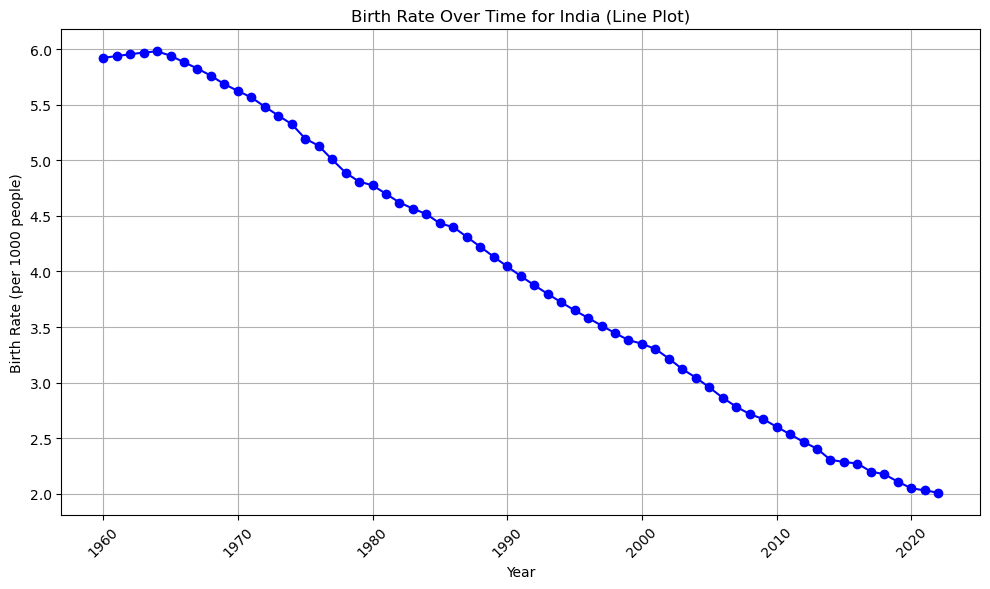

In [23]:
#Visualization (Line plot)

df_country = df_long[df_long['Country Name'] == 'India']
plt.figure(figsize=(10, 6))
plt.plot(df_country['Year'], df_country['Birth Rate'], marker='o', color='b')
plt.title('Birth Rate Over Time for India (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Birth Rate (per 1000 people)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

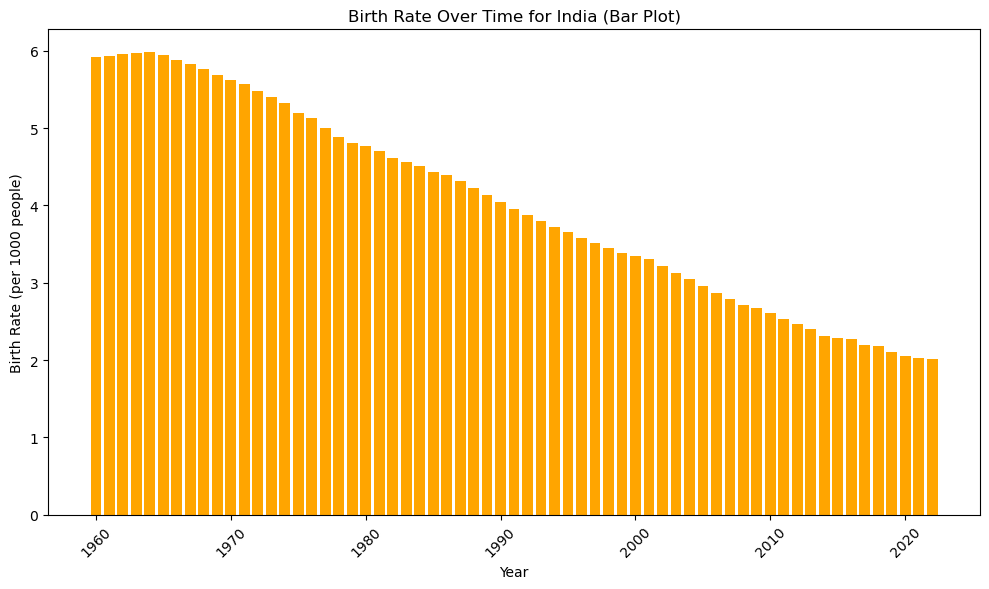

In [24]:
# Bar plot

plt.figure(figsize=(10, 6))
plt.bar(df_country['Year'], df_country['Birth Rate'], color='orange')
plt.title('Birth Rate Over Time for India (Bar Plot)')
plt.xlabel('Year')
plt.ylabel('Birth Rate (per 1000 people)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

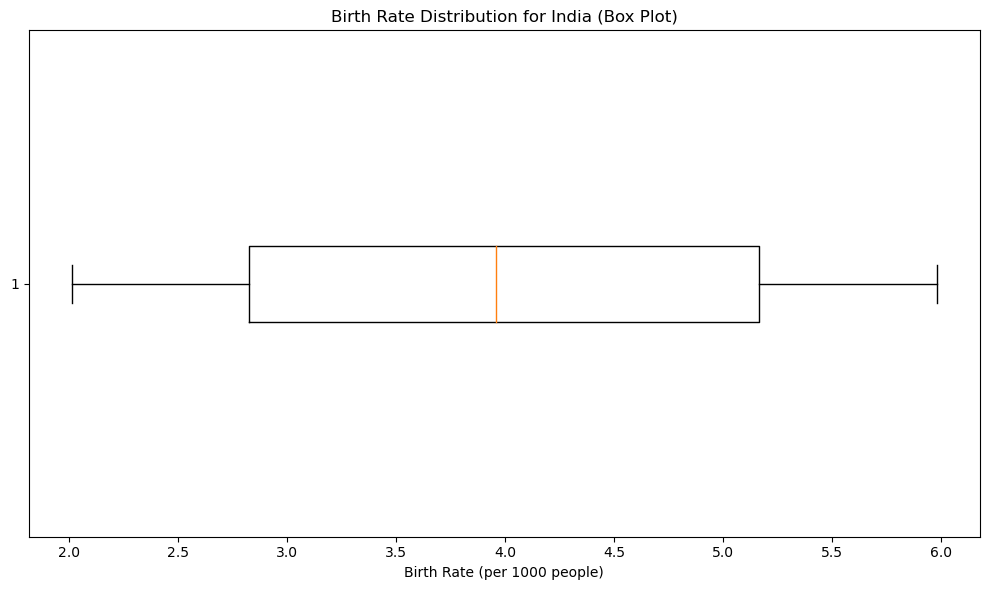

In [25]:
# Box plot

plt.figure(figsize=(10, 6))
plt.boxplot(df_country['Birth Rate'], vert=False)
plt.title('Birth Rate Distribution for India (Box Plot)')
plt.xlabel('Birth Rate (per 1000 people)')
plt.tight_layout()
plt.show()

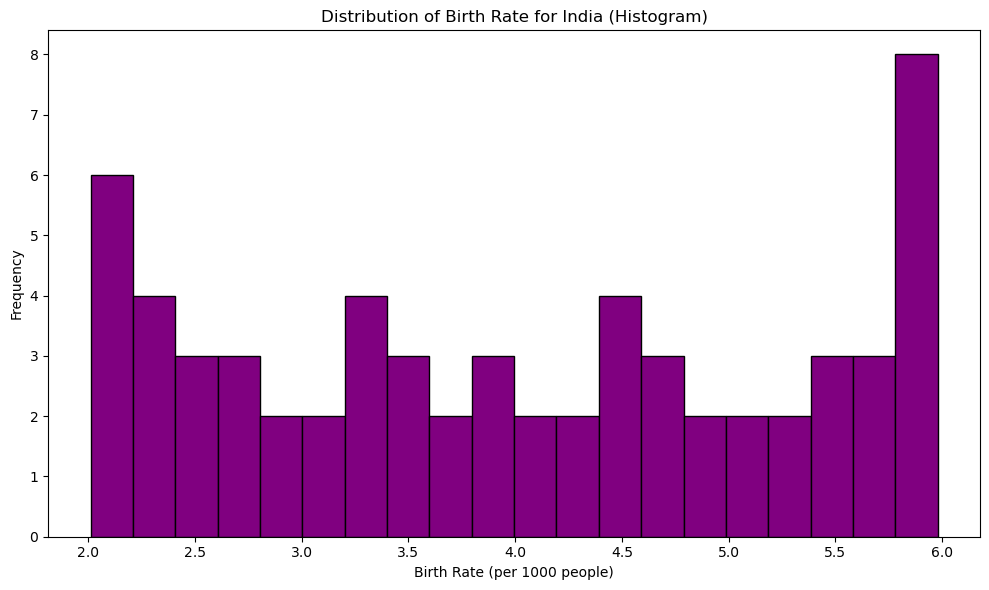

In [26]:
# Histogram (distribution of birth rates)
plt.figure(figsize=(10, 6))
plt.hist(df_country['Birth Rate'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Birth Rate for India (Histogram)')
plt.xlabel('Birth Rate (per 1000 people)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

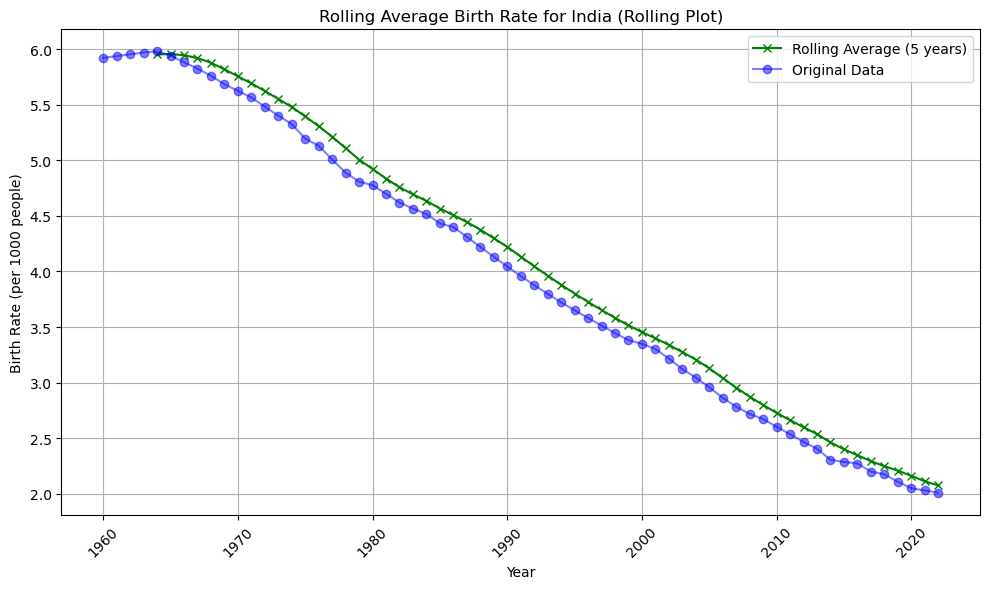

In [30]:
# Rolling plot (with a window size of 5 years)

df_country.loc[:, 'Rolling Average'] = df_country['Birth Rate'].rolling(window=5).mean()
plt.figure(figsize=(10, 6))
plt.plot(df_country['Year'], df_country['Rolling Average'], marker='x', color='green', label='Rolling Average (5 years)')
plt.plot(df_country['Year'], df_country['Birth Rate'], marker='o', color='b', alpha=0.5, label='Original Data')
plt.title('Rolling Average Birth Rate for India (Rolling Plot)')
plt.xlabel('Year')
plt.ylabel('Birth Rate (per 1000 people)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()